First few rows of the dataset:
         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  

Checking for missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-3-c17a156a492d>:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


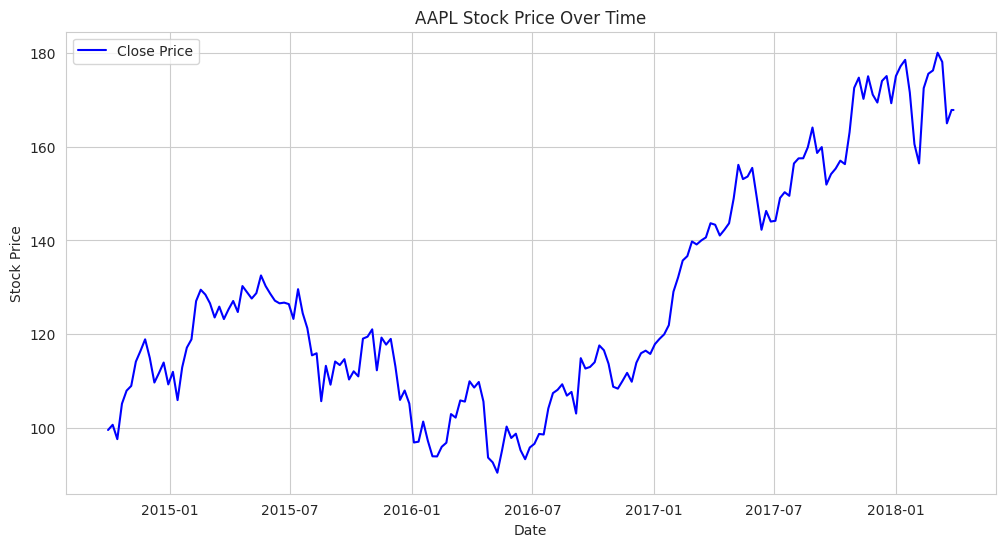

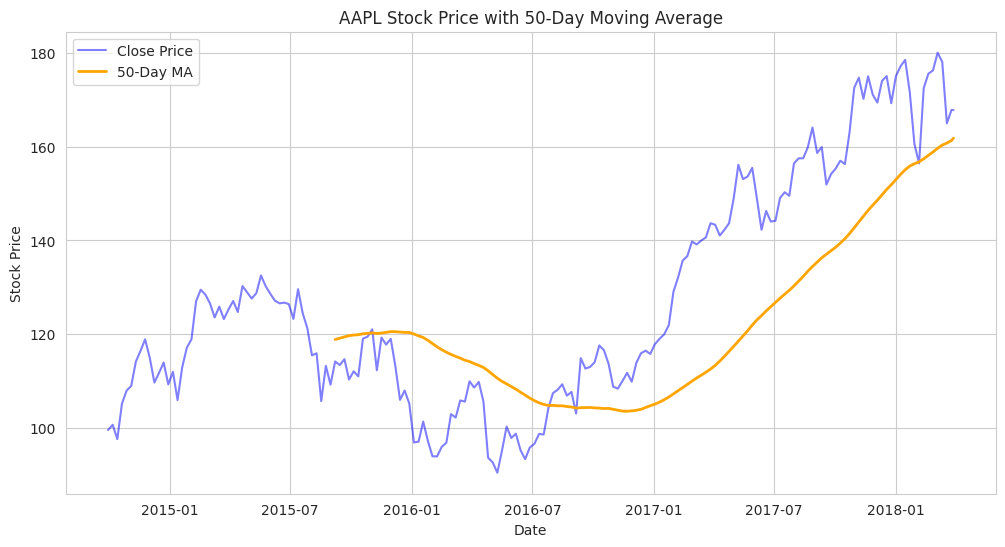

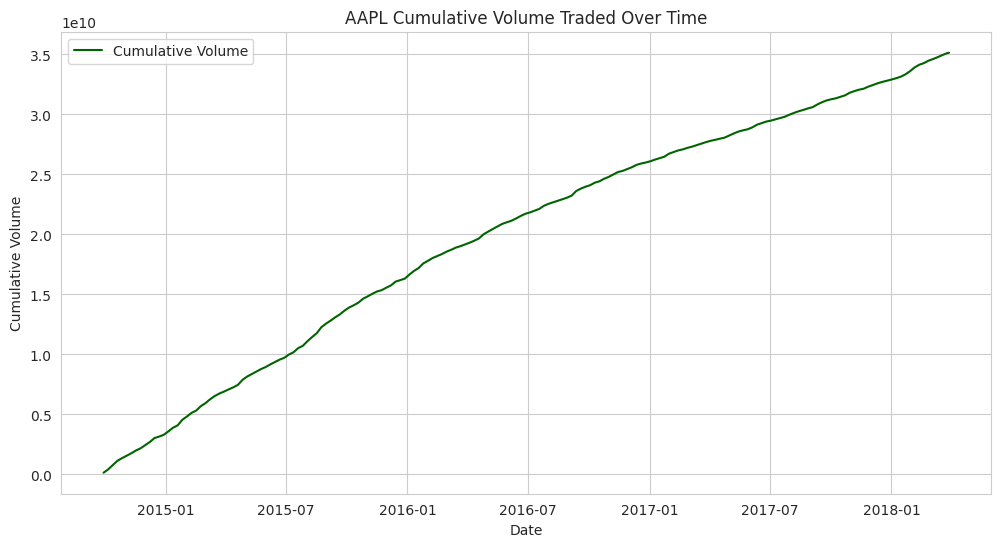

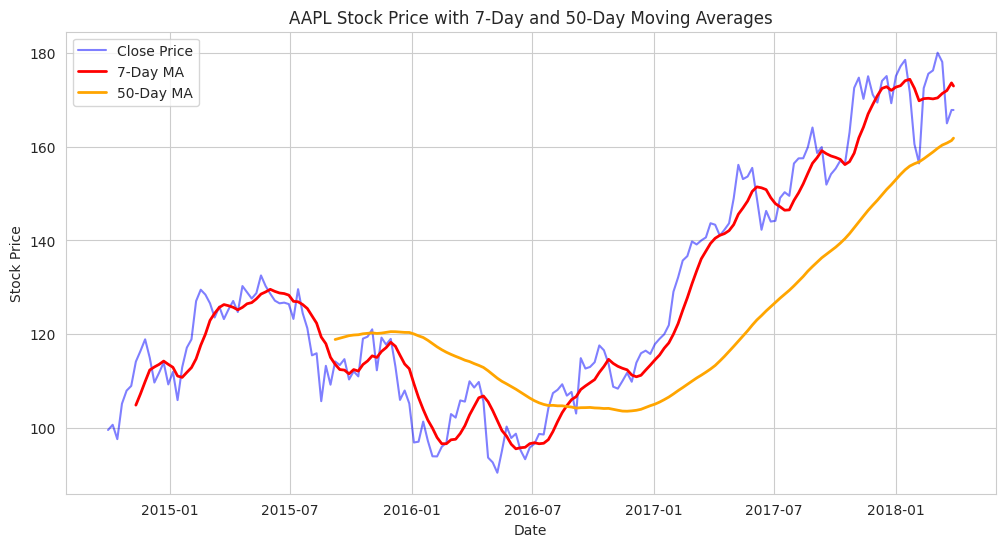

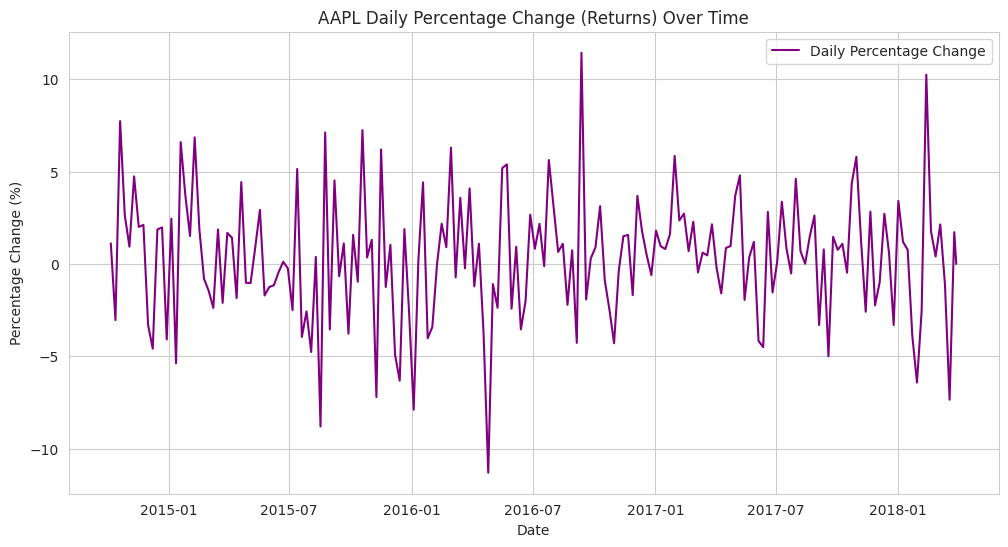

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'AAPL.csv'  # Replace with the path to your dataset
data = pd.read_csv('/content/AAPL.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Preprocessing
# Ensure the 'Date' column is in datetime format and sort by date
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date')
else:
    raise ValueError("The dataset must have a 'Date' column.")

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Handle missing values if any (e.g., forward-fill method)
data.fillna(method='ffill', inplace=True)

# Visualize the time series data
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Assuming 'Close' is the column with stock prices
if 'Close' in data.columns:
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title('AAPL Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
else:
    raise ValueError("The dataset must have a 'Close' column for stock prices.")

# Additional visualization: Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Moving Average

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data.index, data['MA_50'], label='50-Day MA', color='orange', linewidth=2)
plt.title('AAPL Stock Price with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Visualize Cumulative Volume Traded over Time
data['Cumulative_Volume'] = data['Volume'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Volume'], label='Cumulative Volume', color='darkgreen')
plt.title('AAPL Cumulative Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Volume')
plt.legend()
plt.show()


# Additional Moving Averages: 7-day
data['MA_7'] = data['Close'].rolling(window=7).mean()  # 7-day Moving Average

# Plotting Close Price with 7-day and 50-day Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data.index, data['MA_7'], label='7-Day MA', color='red', linewidth=2)
plt.plot(data.index, data['MA_50'], label='50-Day MA', color='orange', linewidth=2)
plt.title('AAPL Stock Price with 7-Day and 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate the daily percentage change (returns)
data['Daily_Return'] = data['Close'].pct_change() * 100

# Visualize the Daily Percentage Change (Returns)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily_Return'], label='Daily Percentage Change', color='purple')
plt.title('AAPL Daily Percentage Change (Returns) Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

# Bar Plot for Volume Traded over Time
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='lightcoral')
plt.title('AAPL Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()




<ipython-input-6-c375d34c471c>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


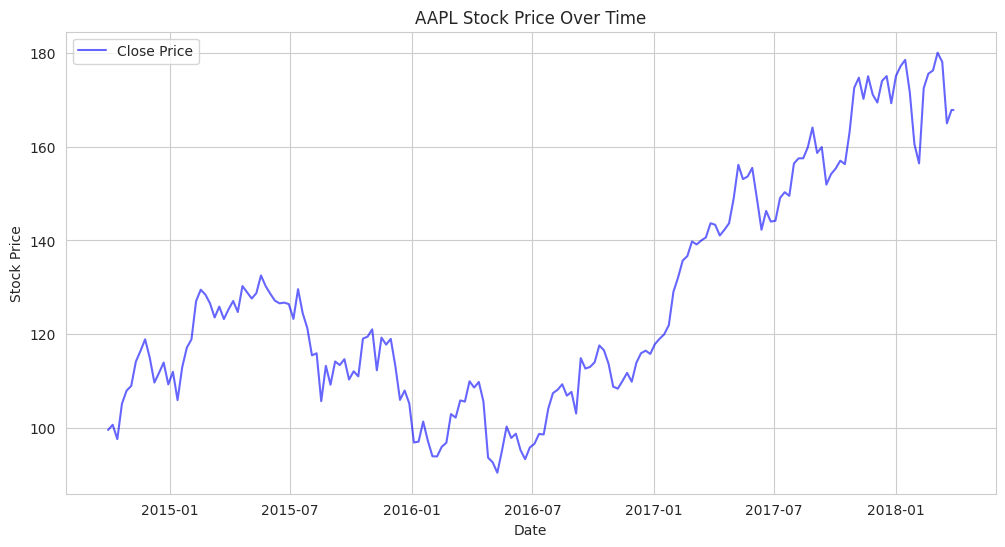

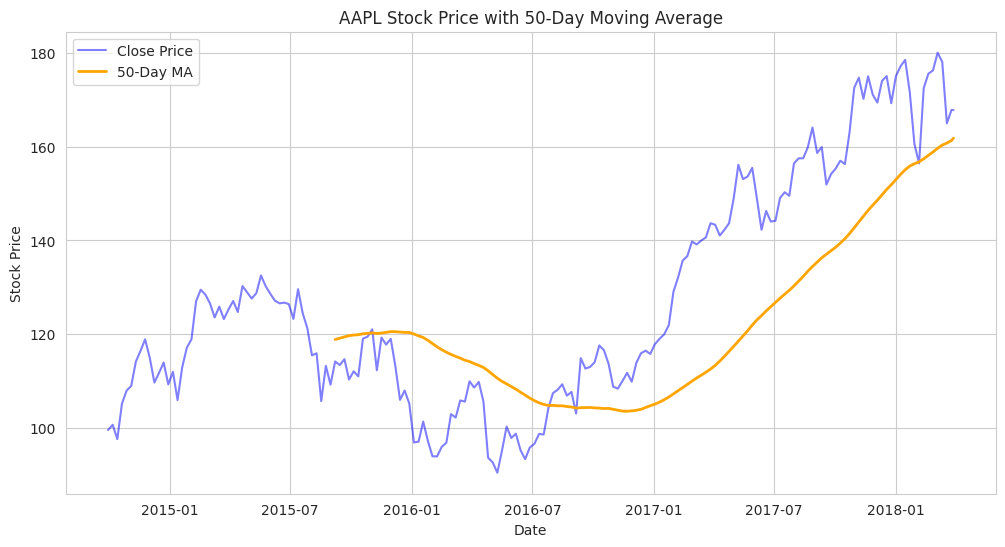

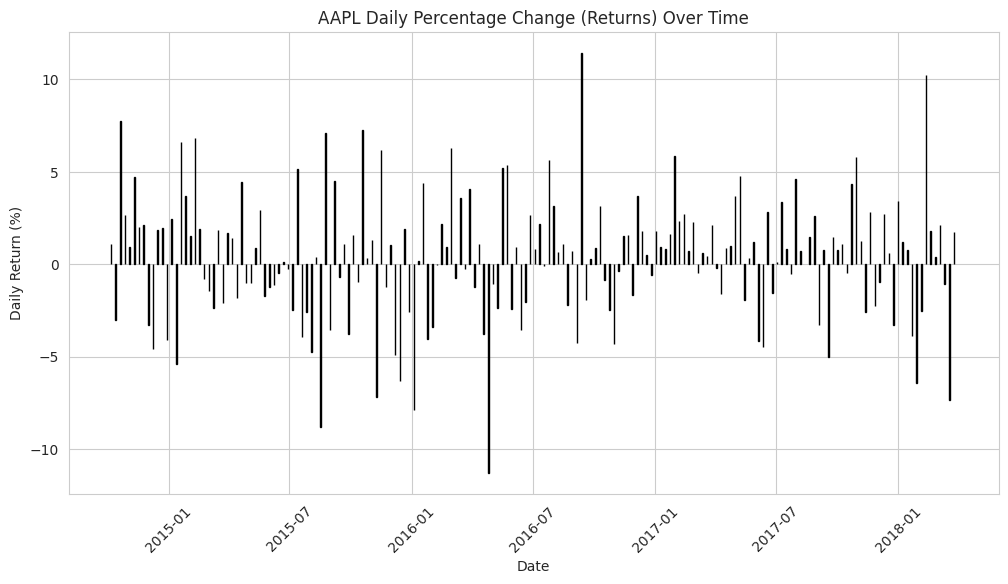

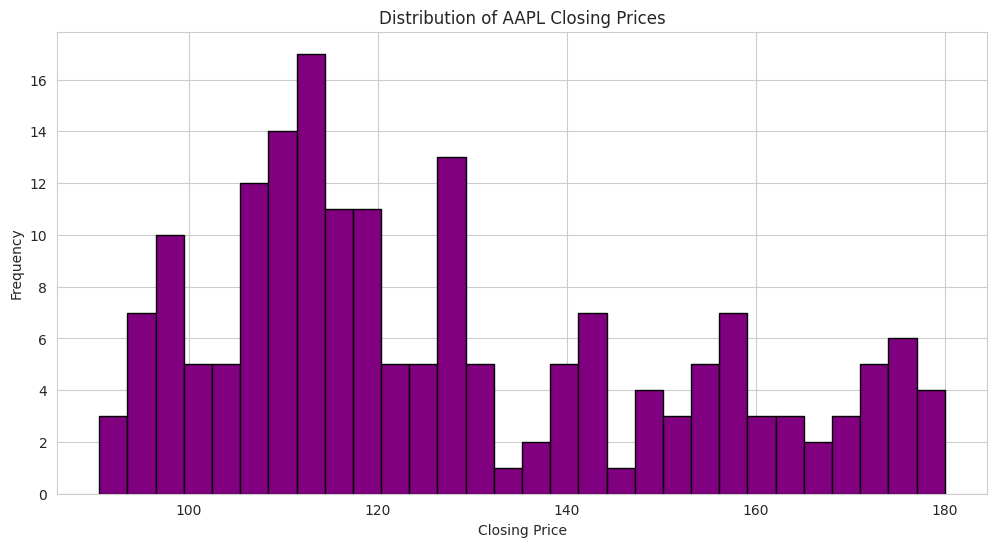

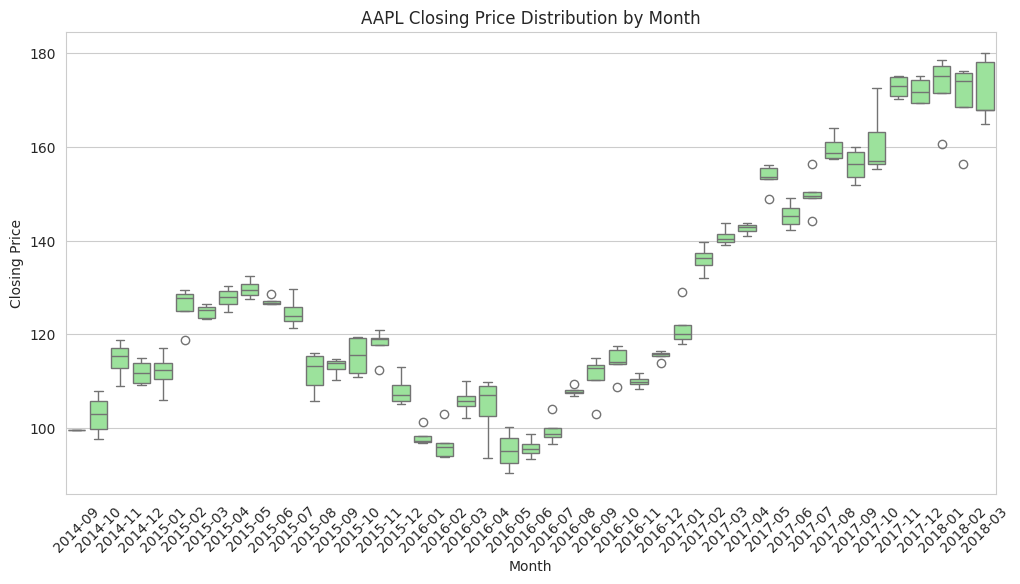

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'AAPL.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

# Preprocessing
# Ensure the 'Date' column is in datetime format and sort by date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
data.set_index('Date', inplace=True)

# Handle missing values if any (e.g., forward-fill method)
data.fillna(method='ffill', inplace=True)

# Create Moving Averages (50-day)
data['MA_50'] = data['Close'].rolling(window=50).mean()

# 1. Line Plot for Closing Price
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 2. Moving Averages: 50-day
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data.index, data['MA_50'], label='50-Day MA', color='orange', linewidth=2)
plt.title('AAPL Stock Price with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate Daily Percentage Change (Returns)
data['Daily_Return'] = data['Close'].pct_change() * 100

# Bar Plot for Daily Percentage Change (Returns)
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Daily_Return'], color='skyblue', edgecolor='black')
plt.title('AAPL Daily Percentage Change (Returns) Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=45)
plt.show()


# 4. Histogram for the Distribution of Closing Prices
plt.figure(figsize=(12, 6))
plt.hist(data['Close'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of AAPL Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Extract Year and Month from the Date
data['Year_Month'] = data.index.to_period('M')

# Box Plot for Closing Prices by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Year_Month'], y=data['Close'], color='lightgreen')
plt.title('AAPL Closing Price Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

